# Required Libraries

In [1]:
import pandas as pd
import re
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/maheshutlapalli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/maheshutlapalli/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/maheshutlapalli/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/maheshutlapalli/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maheshutlapalli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Dataset

## 1. Dataset is used from online retail data of a gift shop.
## 2. Attributes are InvoiceNo, StockCode, Description, Quantity, InvoiceDate UnitPrice, CustomerID, Country.

In [2]:
data = pd.read_csv('Online Retail.csv', encoding= 'unicode_escape')
data.head()

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [3]:
data.rename(columns={"ï»¿InvoiceNo": "InvoiceNo"}, inplace=True)

# checking actual and unique in each attibutes.

In [4]:
for i in data.columns:
  print("Actual number of values",i,len(data[i]))
  print("Unique number of values",i,len(data[i].unique()))

Actual number of values InvoiceNo 541909
Unique number of values InvoiceNo 25900
Actual number of values StockCode 541909
Unique number of values StockCode 4070
Actual number of values Description 541909
Unique number of values Description 4224
Actual number of values Quantity 541909
Unique number of values Quantity 722
Actual number of values InvoiceDate 541909
Unique number of values InvoiceDate 23260
Actual number of values UnitPrice 541909
Unique number of values UnitPrice 1630
Actual number of values CustomerID 541909
Unique number of values CustomerID 4373
Actual number of values Country 541909
Unique number of values Country 38


# Checking null values in each attributes

In [5]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Dropped null values because imputation in not possible in Description column and Customer ID


In [6]:
data.dropna(inplace=True)
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Lets create new fetures from "Description" Column.
## POS tagging of Description column for taking out features as a category.

## Fetched 'noun' as a value and made it a new column name 'Product Type'

## Also take out colours from 'Description' and made a new column name "Colour_type" .

In [7]:
colours = ['red','orange', 'yellow','green', 'blue', 'indigo','violet','purple','pink','silver', 'gold', 'beige', 'brown', 'grey', 'gray', 'black', 'white', 'cream']

stop_words = set(stopwords.words('english'))
Product_type = []
Colour_type = []
dataset=data.head(50000)
for row in dataset.iloc[:,2]:
  s=" "
  description = re.sub('[^a-zA-Z]'," ", str(row).lower()) #cleaning of text data
  wordsList = nltk.word_tokenize(description) #tokenization
  wordsList = [nltk.stem.WordNetLemmatizer().lemmatize(w, 'n') for w in wordsList if not w in stop_words] # lemmitization

  flag=False
  for w in wordsList:
    if w in colours:
      Colour_type.append(w)
      flag=True
      break
  if flag==False:
    Colour_type.append("no_color") #taking out colours from description

  tagged = nltk.pos_tag(wordsList)

  for tag in tagged:
    if tag[1]=='NN' :
      s+=tag[0] +  " "
  Product_type.append(s)

# Adding new columns in dataframe 

In [8]:
dataset['Product Type']=Product_type
dataset['Colour_type']=Colour_type
dataset.head()

/var/folders/bd/0ty0j9554w75j5js1v1n905w0000gn/T/ipykernel_36175/1214141685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Product Type']=Product_type
/var/folders/bd/0ty0j9554w75j5js1v1n905w0000gn/T/ipykernel_36175/1214141685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Colour_type']=Colour_type


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Product Type,Colour_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,heart light holder,white
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,metal lantern,white
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,cream heart coat hanger,cream
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,union flag water bottle,no_color
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,heart,red


# Dropped "Description"and "InvoiceDate" columns

In [9]:
X = dataset.drop(["Description","InvoiceDate"],axis=1)

In [10]:
X.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Product Type,Colour_type
0,536365,85123A,6,2.55,17850.0,United Kingdom,heart light holder,white
1,536365,71053,6,3.39,17850.0,United Kingdom,metal lantern,white
2,536365,84406B,8,2.75,17850.0,United Kingdom,cream heart coat hanger,cream
3,536365,84029G,6,3.39,17850.0,United Kingdom,union flag water bottle,no_color
4,536365,84029E,6,3.39,17850.0,United Kingdom,heart,red


## Created a new feature name 'Revenue'

## revenue = UnitPrice * Quantity

In [11]:
X['Revenue'] = X['UnitPrice'] * X['Quantity']
X.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Product Type,Colour_type,Revenue
0,536365,85123A,6,2.55,17850.0,United Kingdom,heart light holder,white,15.30
1,536365,71053,6,3.39,17850.0,United Kingdom,metal lantern,white,20.34
2,536365,84406B,8,2.75,17850.0,United Kingdom,cream heart coat hanger,cream,22.00
3,536365,84029G,6,3.39,17850.0,United Kingdom,union flag water bottle,no_color,20.34
4,536365,84029E,6,3.39,17850.0,United Kingdom,heart,red,20.34


# Label encoding of categorical features

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for col in ["InvoiceNo", "StockCode", "CustomerID","Country", "Product Type","Colour_type"]:
  X[col] = label_encoder.fit_transform(X[col])

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 79177
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   InvoiceNo     50000 non-null  int64  
 1   StockCode     50000 non-null  int64  
 2   Quantity      50000 non-null  int64  
 3   UnitPrice     50000 non-null  float64
 4   CustomerID    50000 non-null  int64  
 5   Country       50000 non-null  int64  
 6   Product Type  50000 non-null  int64  
 7   Colour_type   50000 non-null  int64  
 8   Revenue       50000 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 3.8 MB


In [14]:
!pip install kmodes 

# Changed the data type of attributes

In [15]:
X = X.astype('category')
X.iloc[:, 2] = X.iloc[:, 2].astype(float)
X.iloc[:, 3] = X.iloc[:, 3].astype(float)
X.iloc[:, 8] = X.iloc[:, 3].astype(float)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 79177
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   InvoiceNo     50000 non-null  category
 1   StockCode     50000 non-null  category
 2   Quantity      50000 non-null  float64 
 3   UnitPrice     50000 non-null  float64 
 4   CustomerID    50000 non-null  category
 5   Country       50000 non-null  category
 6   Product Type  50000 non-null  category
 7   Colour_type   50000 non-null  category
 8   Revenue       50000 non-null  float64 
dtypes: category(6), float64(3)
memory usage: 2.3 MB


# Train test split of new dataframe X

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(X, train_size=0.8, random_state = 0)

# Cluster the similar items for new attribute cluster number, for this K-prototype clustering is used.

# Checking the optimal values of 'K'

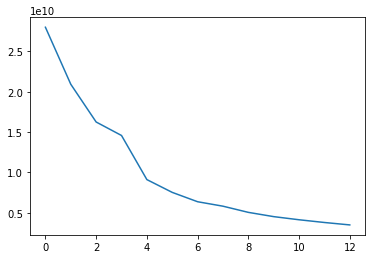

In [17]:
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes

cost = []
for num_clusters in list(range(2,15)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(train, categorical=[4,5,6,7])
    cost.append(kproto.cost_)
    labels=kproto.labels_
plt.plot(cost)

# New attribute cluster number is generated

# Adding new attribute

In [19]:
train["Cluster number"]=labels
train

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Product Type,Colour_type,Revenue,Cluster number
30374,1018,2277,6.0,4.25,997,25,0,7,4.25,0
26561,888,1611,1.0,8.50,1228,25,2151,3,8.50,2
73901,2254,2107,1.0,3.75,1363,25,0,7,3.75,0
55313,1749,2189,16.0,0.65,686,25,903,7,0.65,0
49769,1607,574,1.0,4.95,961,25,1267,7,4.95,1
...,...,...,...,...,...,...,...,...,...,...
31666,1068,1493,24.0,4.25,270,25,277,7,4.25,2
73975,2256,2202,12.0,1.69,224,25,1234,13,1.69,0
69830,2106,1016,3.0,1.65,409,25,1040,7,1.65,1
71017,2146,711,1.0,5.95,896,25,104,7,5.95,1


# Now added "InvoiceDate" in the dataframe

In [20]:
mergedDf = train.merge(pd.DataFrame(dataset["InvoiceDate"]), left_index=True, right_index=True)
mergedDf

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Product Type,Colour_type,Revenue,Cluster number,InvoiceDate
30374,1018,2277,6.0,4.25,997,25,0,7,4.25,0,12/14/10 14:11
26561,888,1611,1.0,8.50,1228,25,2151,3,8.50,2,12/12/10 16:05
73901,2254,2107,1.0,3.75,1363,25,0,7,3.75,0,1/27/11 15:02
55313,1749,2189,16.0,0.65,686,25,903,7,0.65,0,1/12/11 16:14
49769,1607,574,1.0,4.95,961,25,1267,7,4.95,1,1/9/11 14:03
...,...,...,...,...,...,...,...,...,...,...,...
31666,1068,1493,24.0,4.25,270,25,277,7,4.25,2,12/15/10 12:43
73975,2256,2202,12.0,1.69,224,25,1234,13,1.69,0,1/27/11 15:36
69830,2106,1016,3.0,1.65,409,25,1040,7,1.65,1,1/24/11 16:05
71017,2146,711,1.0,5.95,896,25,104,7,5.95,1,1/25/11 13:38


# Feature engineering of "InvoiceDate" column

In [21]:
from datetime import datetime

year = []
month = []
day = []
dayofweek = []
for row in mergedDf["InvoiceDate"]:
  dt=datetime.strptime(row, '%m/%d/%y %H:%M')
  year.append(dt.year)
  month.append(dt.month)
  day.append(dt.day)
  dayofweek.append(dt.strftime("%w"))

mergedDf['Year']=year
mergedDf["Month"]=month
mergedDf["Day"]=day
mergedDf['DayOfWeek']=dayofweek
mergedDf.drop(['InvoiceDate'],axis=1, inplace=True)
mergedDf.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Product Type,Colour_type,Revenue,Cluster number,Year,Month,Day,DayOfWeek
30374,1018,2277,6.0,4.25,997,25,0,7,4.25,0,2010,12,14,2
26561,888,1611,1.0,8.50,1228,25,2151,3,8.50,2,2010,12,12,0
73901,2254,2107,1.0,3.75,1363,25,0,7,3.75,0,2011,1,27,4
55313,1749,2189,16.0,0.65,686,25,903,7,0.65,0,2011,1,12,3
49769,1607,574,1.0,4.95,961,25,1267,7,4.95,1,2011,1,9,0


In [22]:
mergedDf.to_csv('merfedDf.csv')

In [23]:
mergedDf = pd.read_csv('merfedDf.csv')
mergedDf.drop(['Unnamed: 0'], axis =1, inplace=True)
mergedDf.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Product Type,Colour_type,Revenue,Cluster number,Year,Month,Day,DayOfWeek
0,1018,2277,6.0,4.25,997,25,0,7,4.25,0,2010,12,14,2
1,888,1611,1.0,8.50,1228,25,2151,3,8.50,2,2010,12,12,0
2,2254,2107,1.0,3.75,1363,25,0,7,3.75,0,2011,1,27,4
3,1749,2189,16.0,0.65,686,25,903,7,0.65,0,2011,1,12,3
4,1607,574,1.0,4.95,961,25,1267,7,4.95,1,2011,1,9,0


# Classification of test data into number of clusters

# Cluster numbers were treated as a target variable as the objective
# was to match the records from the validation and testing sets with the clusters from the training set.

# Splitting of merdedDF dataframe into traina nd validation

In [24]:
from sklearn.model_selection import train_test_split
train_, val_= train_test_split(mergedDf, train_size = 0.8, random_state = 0)

In [25]:
train_y=train_["Cluster number"]
train_x=train_.drop(['Cluster number'],axis=1,inplace=False)

val_y=val_["Cluster number"]
val_x=val_.drop(['Cluster number'],axis=1,inplace=False)

# For classification

# Linear SVC is used. and it is giving best result among other machine leaning algorithms.

In [26]:
from sklearn.svm import LinearSVC
     

In [27]:
model1 = LinearSVC()
model1.fit(train_x,train_y)

/Users/maheshutlapalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

# validating on test data

In [28]:
pred_y = model1.predict(val_x)

# Preformance evaluation

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(val_y,pred_y)

0.959

# Adding "InvoiceDate" in test data

In [30]:
test_Df = test.merge(pd.DataFrame(dataset["InvoiceDate"]), left_index=True, right_index=True)
test_Df

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Product Type,Colour_type,Revenue,InvoiceDate
17873,617,729,1.0,1.25,1158,25,2158,7,1.25,12/8/10 12:46
29644,985,1181,10.0,1.95,225,25,71,7,1.95,12/14/10 12:22
73585,2238,1608,1.0,7.95,551,25,1793,5,7.95,1/27/11 12:40
39495,1339,197,1.0,2.55,726,25,917,7,2.55,12/20/10 16:08
69859,2106,121,2.0,3.25,409,25,1763,11,3.25,1/24/11 16:05
...,...,...,...,...,...,...,...,...,...,...
38320,1300,1444,3.0,1.25,1099,25,2213,1,1.25,12/20/10 11:08
44202,1447,2035,2.0,2.10,692,25,1254,7,2.10,1/5/11 11:41
75671,2317,216,4.0,1.95,216,25,197,7,1.95,1/30/11 13:48
58928,1855,1031,3.0,2.10,1225,25,1084,13,2.10,1/16/11 16:23


# Feature engineering of "InvoiceDate" column

In [31]:
from datetime import datetime

year = []
month = []
day = []
dayofweek = []
for row in test_Df["InvoiceDate"]:
  dt=datetime.strptime(row, '%m/%d/%y %H:%M')
  year.append(dt.year)
  month.append(dt.month)
  day.append(dt.day)
  dayofweek.append(dt.strftime("%w"))

test_Df['Year']=year
test_Df["Month"]=month
test_Df["Day"]=day
test_Df['DayOfWeek']=dayofweek
test_Df.drop(['InvoiceDate'],axis=1, inplace=True)

test_Df=test_Df.reset_index()
test_Df.drop(["index"],axis=1, inplace = True)
test_Df.head()

test_Df.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Product Type,Colour_type,Revenue,Year,Month,Day,DayOfWeek
0,617,729,1.0,1.25,1158,25,2158,7,1.25,2010,12,8,3
1,985,1181,10.0,1.95,225,25,71,7,1.95,2010,12,14,2
2,2238,1608,1.0,7.95,551,25,1793,5,7.95,2011,1,27,4
3,1339,197,1.0,2.55,726,25,917,7,2.55,2010,12,20,1
4,2106,121,2.0,3.25,409,25,1763,11,3.25,2011,1,24,1


# Prediction of cluster_number on test data

In [32]:
test_Df['Cluster number'] = model1.predict(test_Df)
test_Df 

/Users/maheshutlapalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Product Type,Colour_type,Revenue,Year,Month,Day,DayOfWeek,Cluster number
0,617,729,1.0,1.25,1158,25,2158,7,1.25,2010,12,8,3,2
1,985,1181,10.0,1.95,225,25,71,7,1.95,2010,12,14,2,2
2,2238,1608,1.0,7.95,551,25,1793,5,7.95,2011,1,27,4,0
3,1339,197,1.0,2.55,726,25,917,7,2.55,2010,12,20,1,1
4,2106,121,2.0,3.25,409,25,1763,11,3.25,2011,1,24,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1300,1444,3.0,1.25,1099,25,2213,1,1.25,2010,12,20,1,2
9996,1447,2035,2.0,2.10,692,25,1254,7,2.10,2011,1,5,3,0
9997,2317,216,4.0,1.95,216,25,197,7,1.95,2011,1,30,0,1
9998,1855,1031,3.0,2.10,1225,25,1084,13,2.10,2011,1,16,0,1


# Prediction of "Quantity" column for the products demands

In [33]:
train_y=train_["Quantity"].astype('int')
train_x=train_.drop(['Quantity'], axis=1,inplace=False)

test_Df_y=test_Df["Quantity"].astype('int')
test_Df_x=test_Df.drop(['Quantity'],axis=1,inplace=False)

# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_x, train_y)
knn=neigh.predict(test_Df_x)
print(accuracy_score(test_Df_y, knn))

/Users/maheshutlapalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/maheshutlapalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


0.2676


# SVC with kernel 

In [35]:
from sklearn import svm
from sklearn.svm import SVC

rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(train_x, train_y)

rbf=rbf_svc.predict(test_Df_x)
accuracy_score(test_Df_y, rbf)

/Users/maheshutlapalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.1509

# AdaBoost

In [36]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier(n_estimators=100, random_state=0)
ad.fit(train_x, train_y)
adb=ad.predict(test_Df_x)
print(accuracy_score(test_Df_y, adb))

/Users/maheshutlapalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.2408


# Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier 

dtree_model = DecisionTreeClassifier().fit(train_x, train_y)
dtree_predictions = dtree_model.predict(test_Df_x)
accuracy_score(test_Df_y, dtree_predictions) 

/Users/maheshutlapalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.3006